In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
import warnings
from scipy import stats
import re
from scipy.stats import pearsonr
import matplotlib.ticker as ticker

In [ ]:
# setting configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
# linking google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing data
df = pd.read_csv('/content/drive/MyDrive/Iowa Liquor /Prepared Data/liquor_demo_college_dist_clean.csv', index_col=0)
df.head()

,date,store_name,address,city,zip_code,county,category_name,vendor_name,item_description,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),unique_store,store_latitude,store_longitude,county_population,county_poverty_rate,county_median_earnings_(dollars),city_population,students_in_city,colleges_in_city,closest_college_kilometers,nearest_college,students_nearest_college,competitors_within_10_kilometers,competitors_within_5_kilometers,competitors_within_2_kilometers
0,07/04/2022,HY-VEE WINE AND SPIRITS / ANKENY,410 NORTH ANKENY BLVD,ANKENY,50021,POLK,IMPORTED VODKAS,DIAGEO AMERICAS,KETEL ONE,6,1750,20.99,31.49,6,188.94,10.5,"410 NORTH ANKENY BLVD, ANKENY, 50021",41.734504,-93.602470,501089,10.1,42262,72222,23555.0,2.0,1.849264,Faith Baptist Bible College and Theological Se...,504,42,31,14
1,07/04/2022,HY-VEE WINE AND SPIRITS / ANKENY,410 NORTH ANKENY BLVD,ANKENY,50021,POLK,AMERICAN FLAVORED VODKA,DIAGEO AMERICAS,"SMIRNOFF RED, WHITE & BERRY",6,1750,14.75,22.13,6,132.78,10.5,"410 NORTH ANKENY BLVD, ANKENY, 50021",41.734504,-93.602470,501089,10.1,42262,72222,23555.0,2.0,1.849264,Faith Baptist Bible College and Theological Se...,504,42,31,14
2,07/04/2022,HY-VEE WINE AND SPIRITS / HUBBELL,2310 HUBBELL AVE,DES MOINES,50317,POLK,COCKTAILS/RTD,PROXIMO,JOSE CUERVO AUTHENTIC LIME MARGARITA,6,1750,8.74,13.11,6,78.66,10.5,"2310 HUBBELL AVE, DES MOINES, 50317",41.604613,-93.574132,501089,10.1,42262,211034,9076.0,4.0,2.821928,Grand View University,1874,105,40,7
3,07/04/2022,UNIVERSITY LIQUORS / WDM,9250 UNIVERSITY AVE UNIT 115,WEST DES MOINES,50266,POLK,AMERICAN SCHNAPPS,JIM BEAM BRANDS,DEKUYPER HOT DAMN!,12,750,6.75,10.13,6,60.78,4.5,"9250 UNIVERSITY AVE UNIT 115, WEST DES MOINES,...",41.599689,-93.834562,501089,10.1,42262,70741,0.0,0.0,6.698595,Des Moines University-Osteopathic Medical Center,1559,94,36,6
4,07/04/2022,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314,POLK,IMPORTED VODKAS,JIM BEAM BRANDS,EFFEN 80PRF,6,750,12.50,18.75,6,112.50,4.5,"1460 2ND AVE, DES MOINES, 50314",41.605652,-93.620233,501089,10.1,42262,211034,9076.0,4.0,0.910683,Des Moines Area Community College,23051,132,49,9


In [ ]:
df.shape

(2634425, 31)

# 01. Correlation Analysis

In [ ]:
# create a correlation matrix
corr_matrix = df[['pack', 'bottle_volume_(ml)', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_(dollars)', 'volume_sold_(liters)',
                  'county_population', 'county_poverty_rate', 'county_median_earnings_(dollars)', 'city_population', 'students_in_city', 'colleges_in_city',
                  'closest_college_kilometers', 'students_nearest_college', 'competitors_within_10_kilometers', 'competitors_within_5_kilometers',
                  'competitors_within_2_kilometers']].corr()
corr_matrix

,pack,bottle_volume_(ml),state_bottle_cost,state_bottle_retail,bottles_sold,sale_(dollars),volume_sold_(liters),county_population,county_poverty_rate,county_median_earnings_(dollars),city_population,students_in_city,colleges_in_city,closest_college_kilometers,students_nearest_college,competitors_within_10_kilometers,competitors_within_5_kilometers,competitors_within_2_kilometers
pack,1.000000,-0.434272,-0.249656,-0.249498,0.207445,-0.035131,-0.028998,0.046387,0.018804,0.020934,0.082026,0.031070,0.083141,-0.052303,-0.011091,0.072734,0.086483,0.049855
bottle_volume_(ml),-0.434272,1.000000,0.074208,0.074401,-0.018671,0.081484,0.146002,-0.085892,-0.019933,-0.049060,-0.088470,-0.048714,-0.070343,0.076661,-0.008757,-0.100900,-0.108316,-0.055196
state_bottle_cost,-0.249656,0.074208,1.000000,0.999838,-0.057007,0.083880,-0.011156,0.009520,-0.002434,0.008468,0.002559,0.007304,-0.005077,-0.008785,0.011024,0.008420,0.007751,0.014904
state_bottle_retail,-0.249498,0.074401,0.999838,1.000000,-0.056983,0.083910,-0.011127,0.009519,-0.002422,0.008453,0.002556,0.007317,-0.005085,-0.008808,0.011048,0.008422,0.007758,0.014897
bottles_sold,0.207445,-0.018671,-0.057007,-0.056983,1.000000,0.801245,0.868231,0.045045,0.005978,0.024115,0.069584,0.034607,0.062644,-0.046186,0.010940,0.056875,0.062307,0.048296
sale_(dollars),-0.035131,0.081484,0.083880,0.083910,0.801245,1.000000,0.828480,0.039715,0.002350,0.023764,0.052284,0.029925,0.041015,-0.038405,0.020050,0.046725,0.046761,0.038903
volume_sold_(liters),-0.028998,0.146002,-0.011156,-0.011127,0.868231,0.828480,1.000000,0.018501,0.000820,0.011128,0.029052,0.018873,0.025689,-0.021273,0.011786,0.023952,0.024199,0.023612
county_population,0.046387,-0.085892,0.009520,0.009519,0.045045,0.039715,0.018501,1.000000,-0.105390,0.509782,0.652966,0.267236,0.366552,-0.431680,-0.015279,0.805852,0.591387,0.239257
county_poverty_rate,0.018804,-0.019933,-0.002434,-0.002422,0.005978,0.002350,0.000820,-0.105390,1.000000,-0.700787,-0.011142,0.370130,0.000092,-0.098752,0.518803,-0.041615,0.107461,0.096530
county_median_earnings_(dollars),0.020934,-0.049060,0.008468,0.008453,0.024115,0.023764,0.011128,0.509782,-0.700787,1.000000,0.320732,-0.157730,0.207470,-0.097589,-0.425951,0.442650,0.247365,0.088917


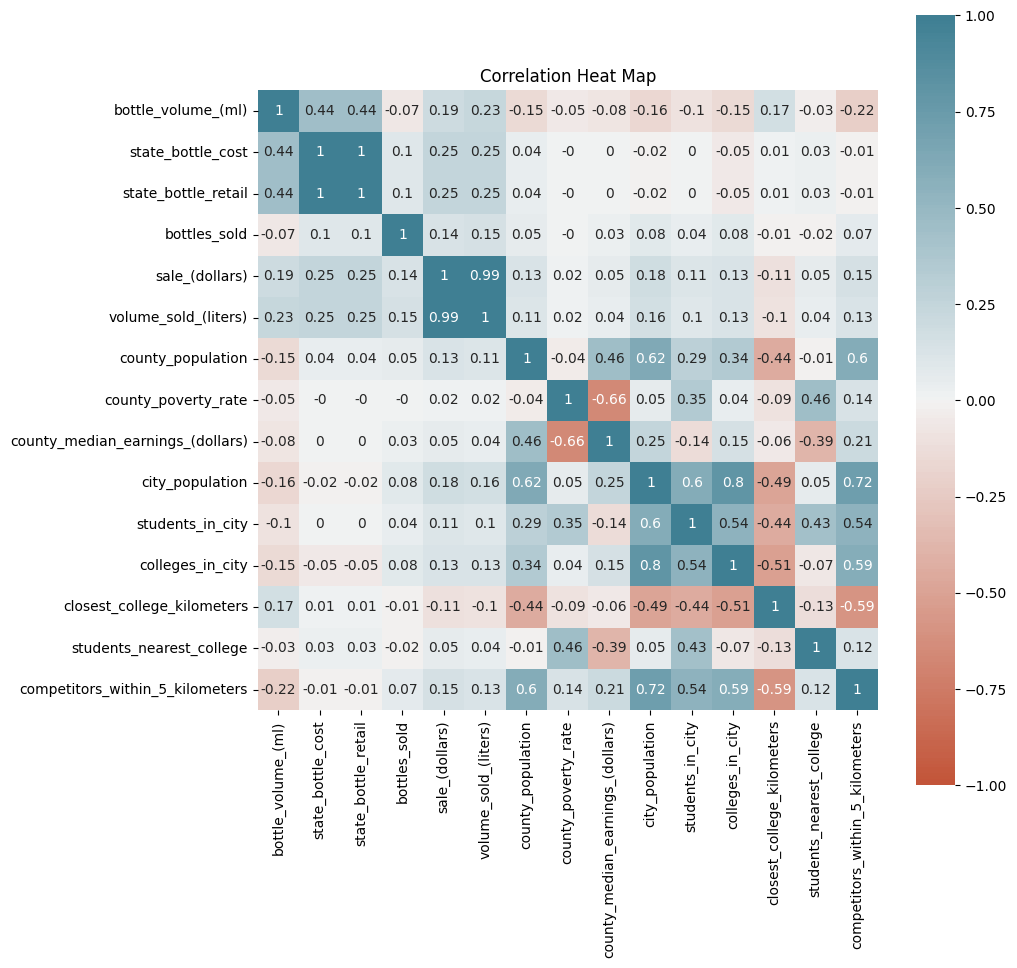

In [ ]:
# group by 'unique_store' and aggregate relevant columns
df_grouped = df.groupby('unique_store').agg({
    'bottle_volume_(ml)': 'mean',
    'state_bottle_cost': 'mean',
    'state_bottle_retail': 'mean',
    'bottles_sold': 'mean',
    'sale_(dollars)': 'sum',
    'volume_sold_(liters)': 'sum',
    'county_population': 'first',
    'county_poverty_rate': 'first',
    'county_median_earnings_(dollars)': 'first',
    'city_population': 'first',
    'students_in_city': 'first',
    'colleges_in_city': 'first',
    'closest_college_kilometers': 'first',
    'students_nearest_college': 'first',
    'competitors_within_5_kilometers': 'first'
}).reset_index()

# calculating the correlation matrix
corr = df_grouped.corr().round(2)

# generating a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.title('Correlation Heat Map')
plt.show()

# 02. Scatterplots

### A. Store Sales and City Population

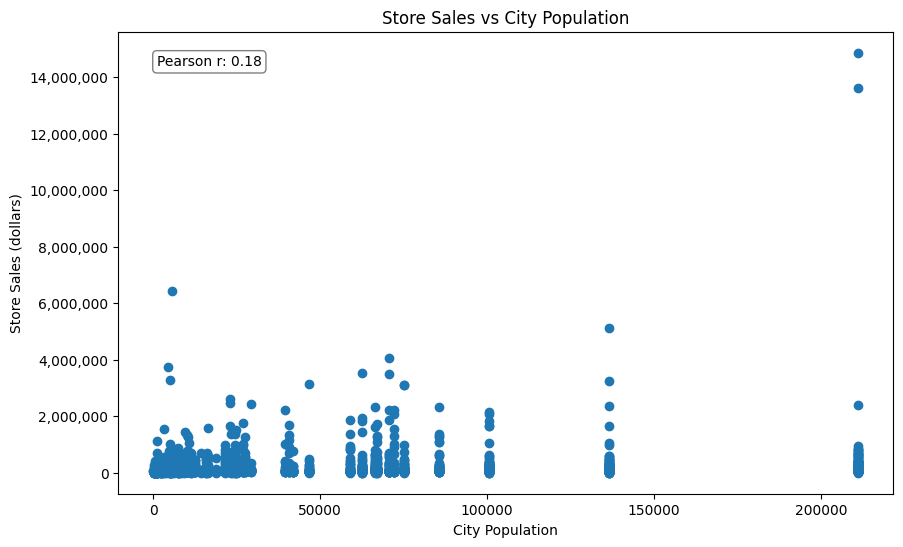

In [ ]:
# group sales by store_name and city_population
store_sales = df.groupby(['store_name', 'city_population'])['sale_(dollars)'].sum().reset_index()

# calculate pearson correlation coefficient
corr, _ = pearsonr(store_sales['city_population'], store_sales['sale_(dollars)'])
corr = round(corr, 2)  # Rounding to 2 decimal places

plt.figure(figsize=(10,6))
plt.scatter(store_sales['city_population'], store_sales['sale_(dollars)'])

# set the format of the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('City Population')
plt.ylabel('Store Sales (dollars)')
plt.title('Store Sales vs City Population')

# add correlation coefficient on the plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/store_sales_population.png')  # saving plot
plt.show()


Store sales tend to be higher in cities with higher populations although this relationship is not very clear. This is likely due to the fact that there is an increase in competitors with an increase in population as shown in the scatterplots below.

### B. Competitors and Population

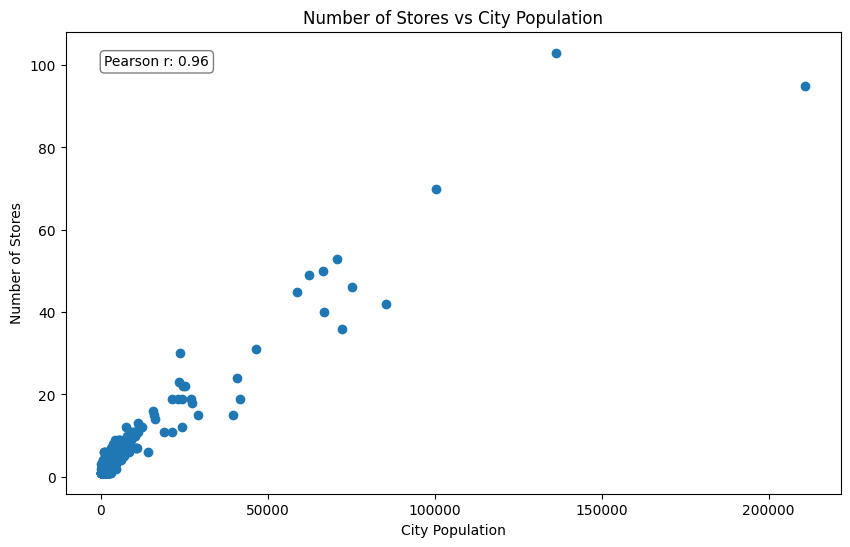

In [ ]:
# group by city and count the unique store names
store_count = df.groupby('city_population')['store_name'].nunique().reset_index()

# calculate the Pearson correlation coefficient
corr, _ = pearsonr(store_count['city_population'], store_count['store_name'])
corr = round(corr, 2)  # rounding to 2 decimal places

plt.figure(figsize=(10,6))
plt.scatter(store_count['city_population'], store_count['store_name'])

plt.xlabel('City Population')
plt.ylabel('Number of Stores')
plt.title('Number of Stores vs City Population')

# add the correlation coefficient on the plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/number_of_stores_population.png')  # saving plot
plt.show()

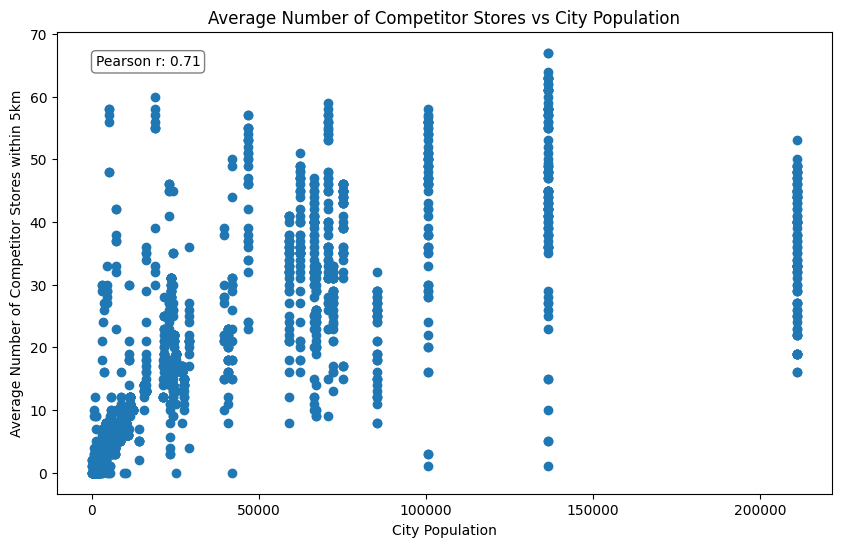

In [ ]:
# group by store_name and calculate the mean number of competitor stores within 5 km
mean_competitors = df.groupby(['store_name', 'city_population'])['competitors_within_5_kilometers'].mean().reset_index()

# calculate the Pearson correlation coefficient
corr, _ = pearsonr(mean_competitors['city_population'], mean_competitors['competitors_within_5_kilometers'])
corr = round(corr, 2)

plt.figure(figsize=(10,6))
plt.scatter(mean_competitors['city_population'], mean_competitors['competitors_within_5_kilometers'])

plt.xlabel('City Population')
plt.ylabel('Average Number of Competitor Stores within 5km')
plt.title('Average Number of Competitor Stores vs City Population')

# add the correlation coefficient on the plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/competitor_stores_population.png')  # saving plot
plt.show()

### C. Colleges

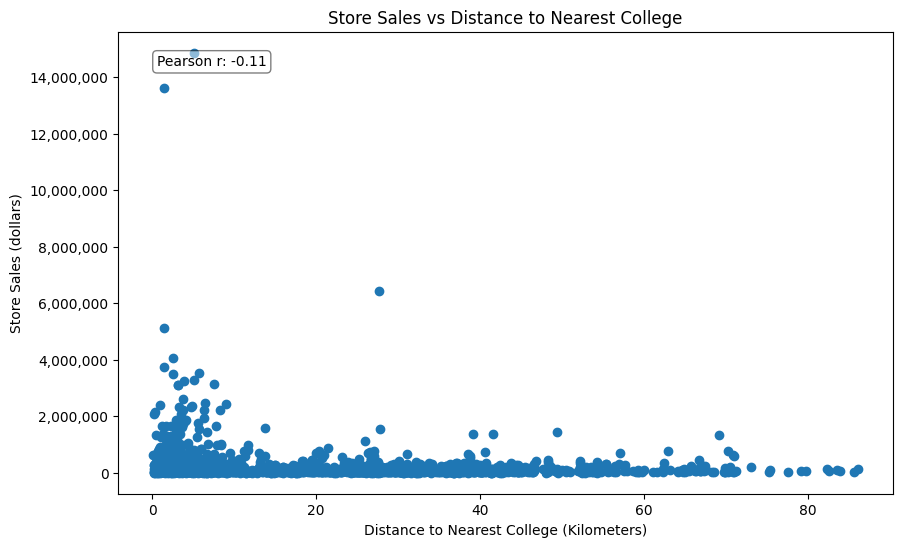

In [ ]:
# group sales by store_name and calculate sum of sales and mean distance to nearest college
store_sales_college_dist = df.groupby('store_name').agg({'sale_(dollars)': 'sum', 'closest_college_kilometers': 'mean'}).reset_index()

# calculate the Pearson correlation coefficient
corr, _ = pearsonr(store_sales_college_dist['closest_college_kilometers'], store_sales_college_dist['sale_(dollars)'])
corr = round(corr, 2)

plt.figure(figsize=(10,6))
plt.scatter(store_sales_college_dist['closest_college_kilometers'], store_sales_college_dist['sale_(dollars)'])

# set the format of the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Distance to Nearest College (Kilometers)')
plt.ylabel('Store Sales (dollars)')
plt.title('Store Sales vs Distance to Nearest College')

# add the correlation coefficient on the plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/sales_college_distance.png')  # saving plot
plt.show()

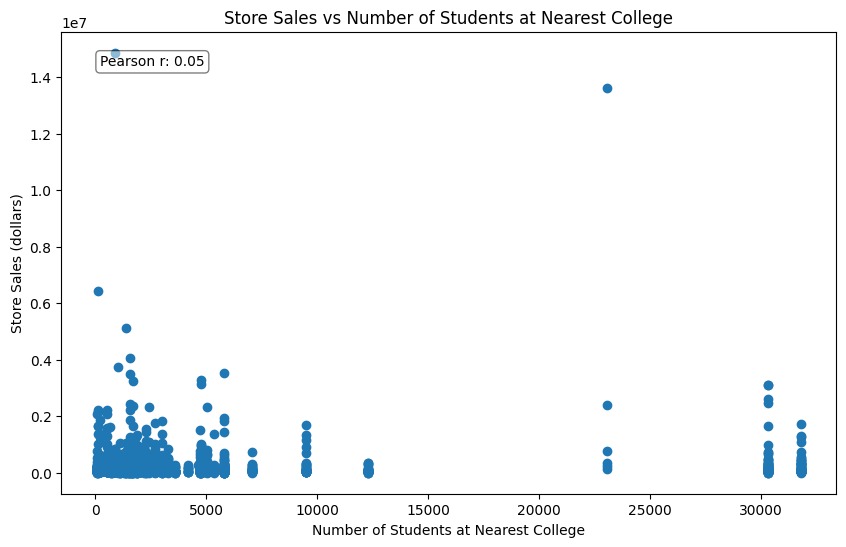

In [ ]:
# group by store_name and calculate sum of sales and mean number of students at the nearest college
store_sales_students = df.groupby('store_name').agg({'sale_(dollars)': 'sum', 'students_nearest_college': 'mean'}).reset_index()

# calculate the Pearson correlation coefficient
corr, _ = pearsonr(store_sales_students['students_nearest_college'], store_sales_students['sale_(dollars)'])
corr = round(corr, 2)

plt.figure(figsize=(10,6))
plt.scatter(store_sales_students['students_nearest_college'], store_sales_students['sale_(dollars)'])

plt.xlabel('Number of Students at Nearest College')
plt.ylabel('Store Sales (dollars)')
plt.title('Store Sales vs Number of Students at Nearest College')

# add the correlation coefficient on the plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/sales_nearest_students.png')  # saving plot
plt.show()


So far it looks the impact of being near a college has a negelible impact on store sales. Let's have a look at the 3 largest cities in Iowa and see if it's any different.

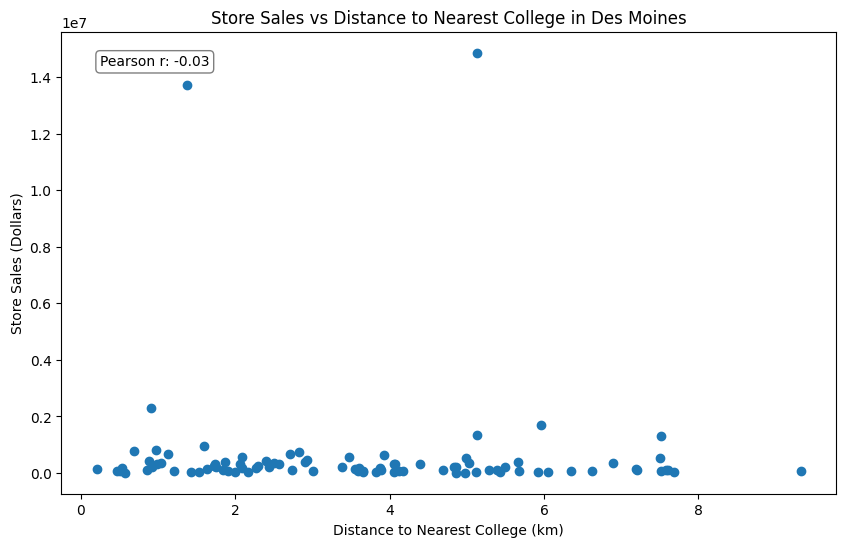

In [ ]:
des_moines_df = grouped_df[grouped_df['city'] == 'DES MOINES']

# Create scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(des_moines_df['closest_college_kilometers'], des_moines_df['sale_(dollars)'])
corr, _ = pearsonr(des_moines_df['closest_college_kilometers'], des_moines_df['sale_(dollars)'])

corr = round(corr, 2)
plt.xlabel('Distance to Nearest College (km)')
plt.ylabel('Store Sales (Dollars)')
plt.title('Store Sales vs Distance to Nearest College in Des Moines')
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/sales_distance_desmoines.png')  # saving plot
plt.show()

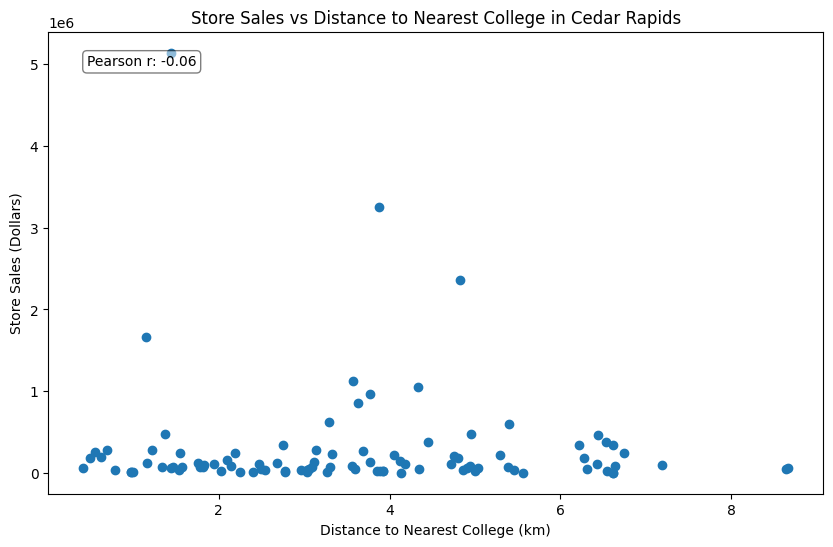

In [ ]:
cedar_rapids_df = grouped_df[grouped_df['city'] == 'CEDAR RAPIDS']

# Create scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(cedar_rapids_df['closest_college_kilometers'], cedar_rapids_df['sale_(dollars)'])
corr, _ = pearsonr(cedar_rapids_df['closest_college_kilometers'], cedar_rapids_df['sale_(dollars)'])

corr = round(corr, 2)
plt.xlabel('Distance to Nearest College (km)')
plt.ylabel('Store Sales (Dollars)')
plt.title('Store Sales vs Distance to Nearest College in Cedar Rapids')
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/sales_distance_cedarrapids.png')  # saving plot
plt.show()

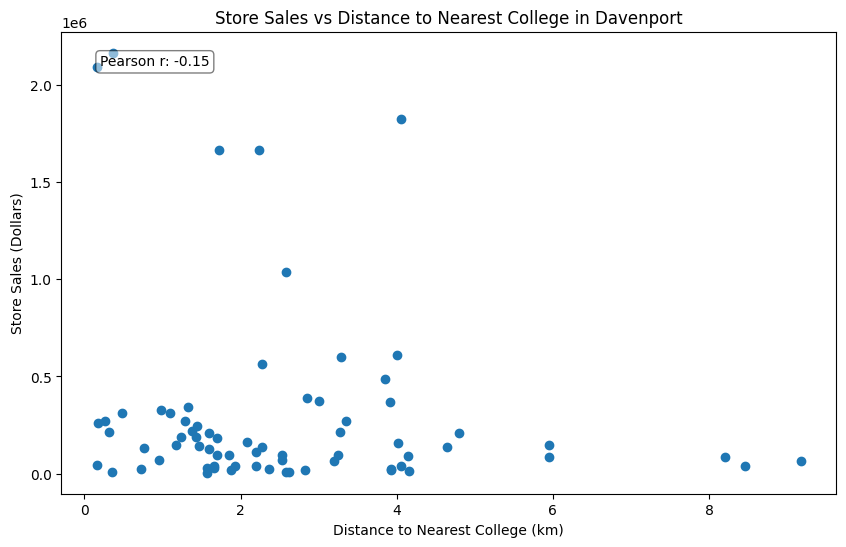

In [ ]:
davenport_df = grouped_df[grouped_df['city'] == 'DAVENPORT']

# Create scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(davenport_df['closest_college_kilometers'], davenport_df['sale_(dollars)'])
corr, _ = pearsonr(davenport_df['closest_college_kilometers'], davenport_df['sale_(dollars)'])

corr = round(corr, 2)
plt.xlabel('Distance to Nearest College (km)')
plt.ylabel('Store Sales (Dollars)')
plt.title('Store Sales vs Distance to Nearest College in Davenport')
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/sales_distance_davenport.png')  # saving plot
plt.show()

So far it looks like there is no clear relationship even when zoomed in at a city level, we will pause here and perhaps revisit the affect of colleges on liquor sales at a later stage.

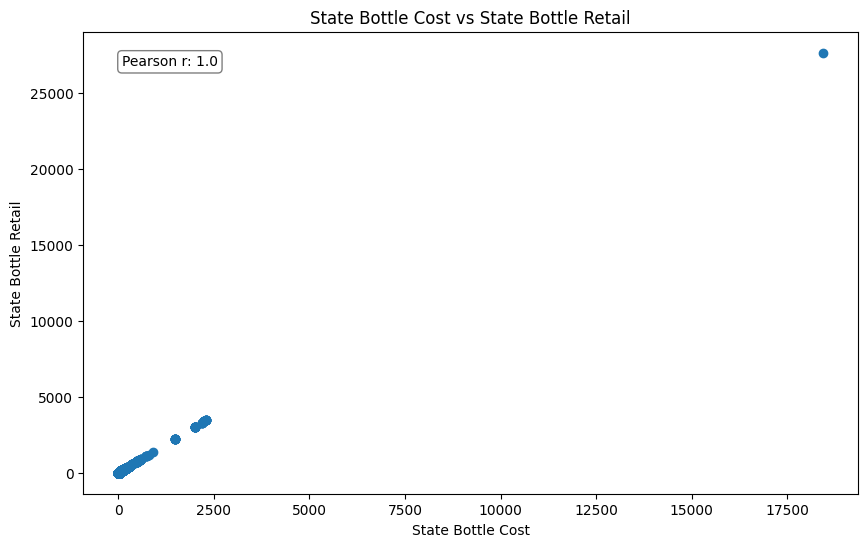

In [ ]:
# calculate the correlation coefficient
corr, _ = pearsonr(df['state_bottle_cost'], df['state_bottle_retail'])
corr = round(corr, 2)

# create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['state_bottle_cost'], df['state_bottle_retail'])
plt.xlabel('State Bottle Cost')
plt.ylabel('State Bottle Retail')
plt.title('State Bottle Cost vs State Bottle Retail')

# add correlation coefficient to plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# save plot
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/cost_retail_scat.png')

plt.show()


State bottle retail prices tend to rise with increased state bottle costs.

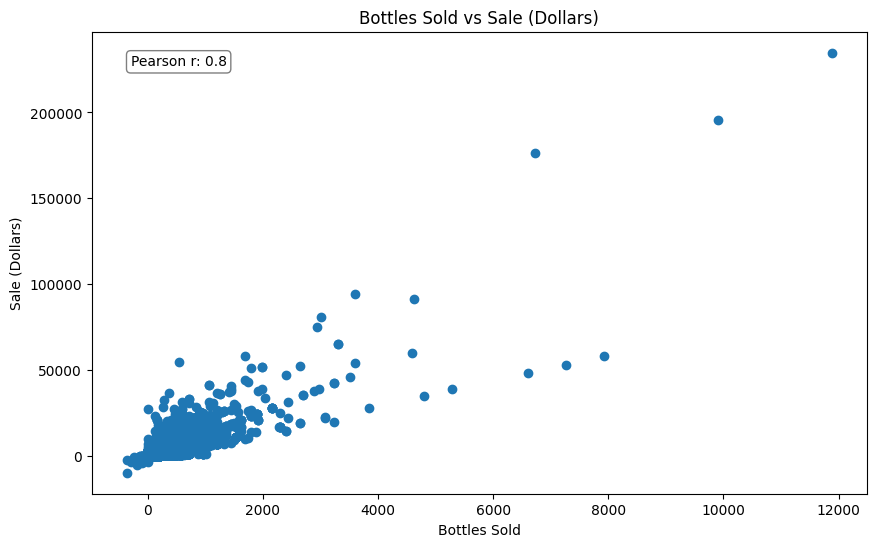

In [ ]:
# calculate the correlation coefficient
corr, _ = pearsonr(df['bottles_sold'], df['sale_(dollars)'])
corr = round(corr, 2)

# create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['bottles_sold'], df['sale_(dollars)'])
plt.xlabel('Bottles Sold')
plt.ylabel('Sale (Dollars)')
plt.title('Bottles Sold vs Sale (Dollars)')

# add correlation coefficient to plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# save plot
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/bot_dollar_scat.png')

plt.show()


Sales tend to increase with the number of bottles sold.

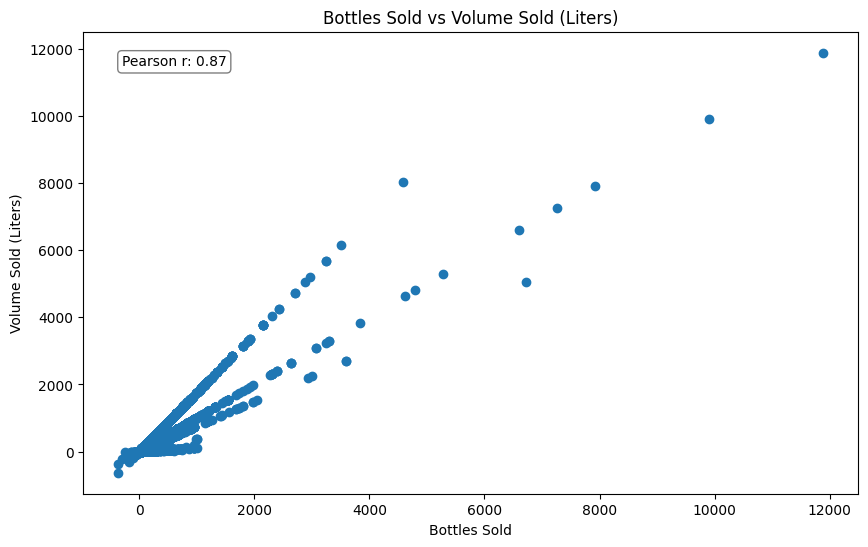

In [ ]:
# calculate the correlation coefficient
corr, _ = pearsonr(df['bottles_sold'], df['volume_sold_(liters)'])
corr = round(corr, 2)

# create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['bottles_sold'], df['volume_sold_(liters)'])
plt.xlabel('Bottles Sold')
plt.ylabel('Volume Sold (Liters)')
plt.title('Bottles Sold vs Volume Sold (Liters)')

# add correlation coefficient to plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# save plot
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/bot_vol_scat.png')

plt.show()


The more bottles sold the large the volume of liters

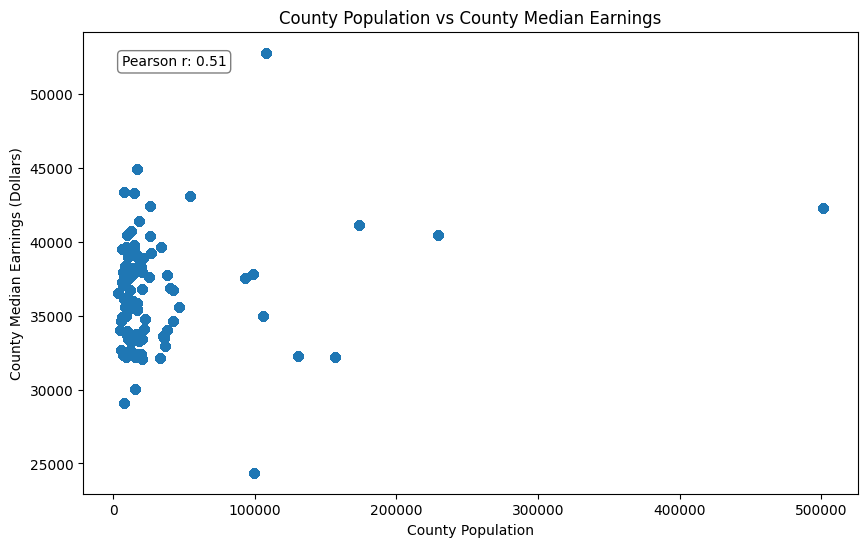

In [ ]:
# calculate the correlation coefficient
corr, _ = pearsonr(df['county_population'], df['county_median_earnings_(dollars)'])
corr = round(corr, 2)

# create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['county_population'], df['county_median_earnings_(dollars)'])
plt.xlabel('County Population')
plt.ylabel('County Median Earnings (Dollars)')
plt.title('County Population vs County Median Earnings')

# add correlation coefficient to plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# save plot
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/pop_earnings_scat.png')

plt.show()


The larger the population the higher median earnings.

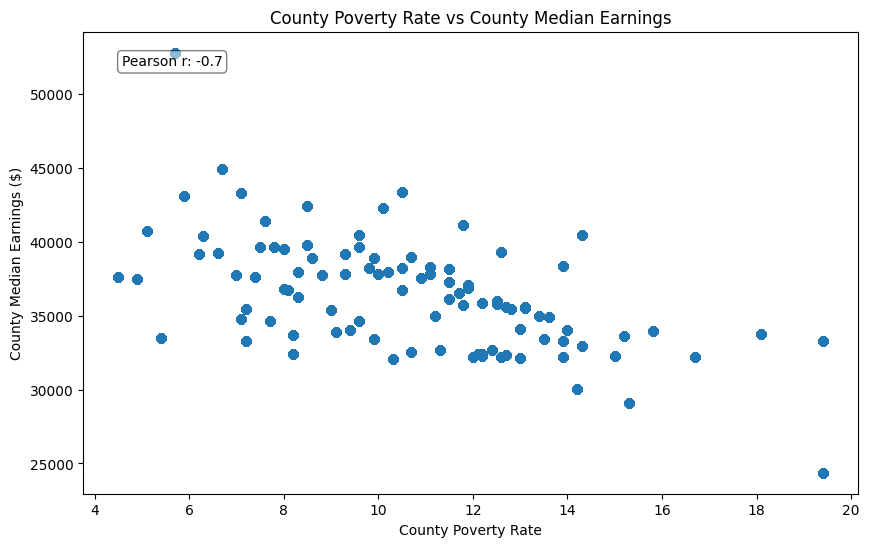

In [ ]:
# calculate the correlation coefficient
corr, _ = pearsonr(df['county_poverty_rate'], df['county_median_earnings_(dollars)'])
corr = round(corr, 2)

# create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['county_poverty_rate'], df['county_median_earnings_(dollars)'])
plt.xlabel('County Poverty Rate')
plt.ylabel('County Median Earnings ($)')
plt.title('County Poverty Rate vs County Median Earnings')

# add correlation coefficient to plot
plt.text(0.05, 0.95, f'Pearson r: {corr}', transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# save plot
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/pov_earnings_scat.png')

plt.show()


The county poverty rate tends to increase with a decrease in median earnings.

# 03. Pairplots

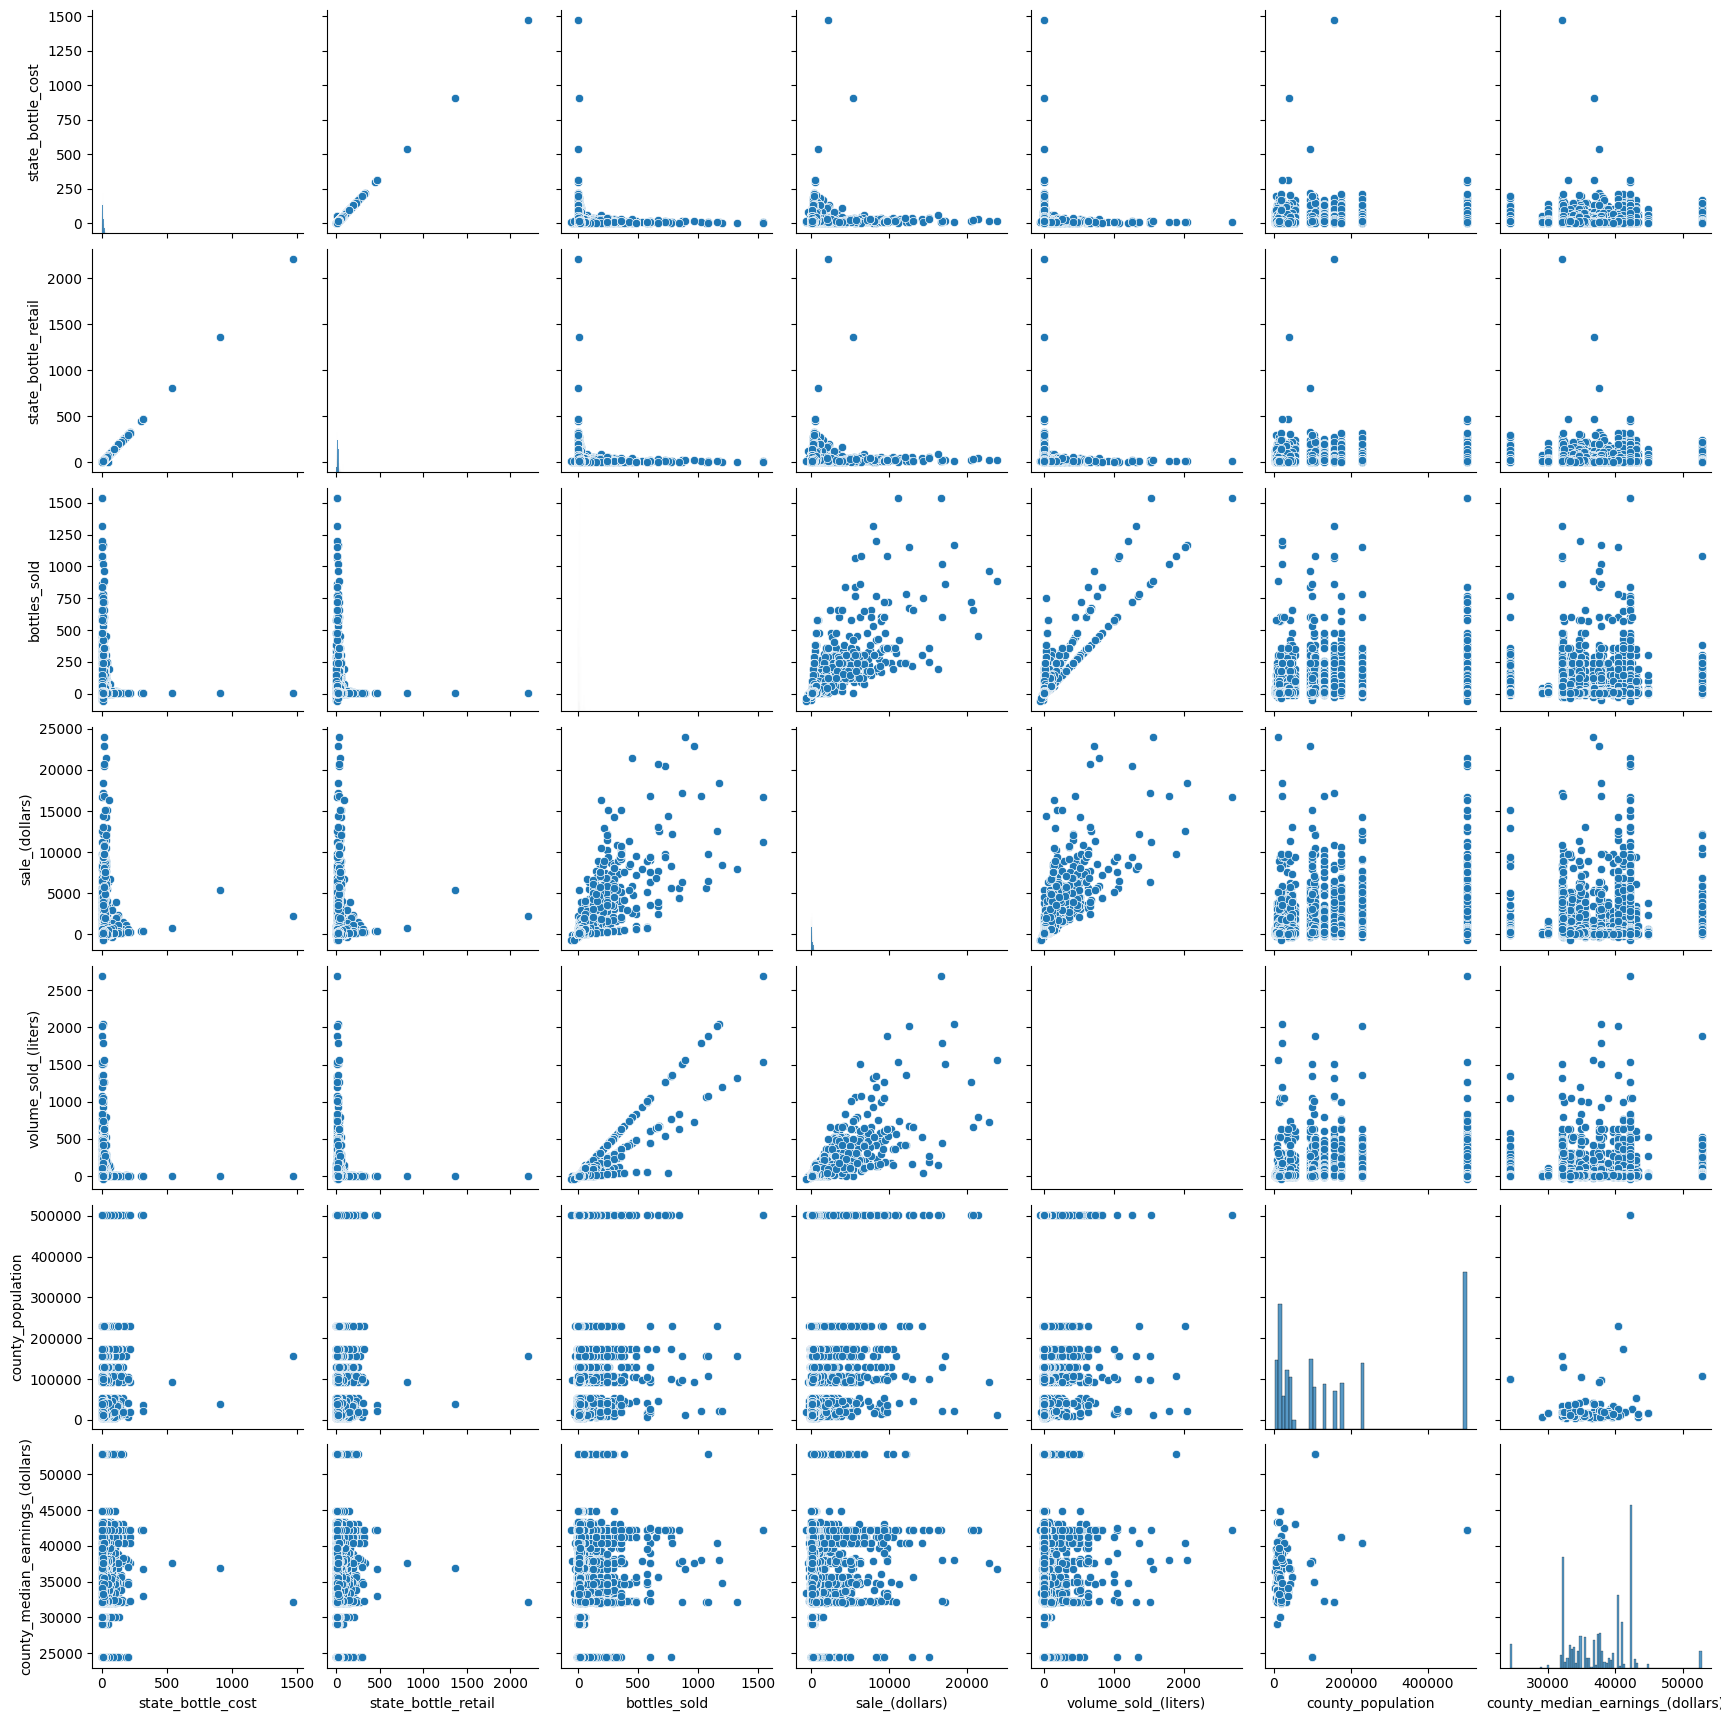

In [ ]:
# create a subset by sampling
sample_df = df.sample(n=100000, random_state=1)

# select columns for pairplot
cols_to_plot = ['state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
                'sale_(dollars)', 'volume_sold_(liters)', 'county_population',
                'county_median_earnings_(dollars)']

# create the pairplot
sns.pairplot(sample_df[cols_to_plot])

plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/pair_plots.png')  # saving plot

plt.show()

# 04. Categorical Plots

### A. Top 10 Categories

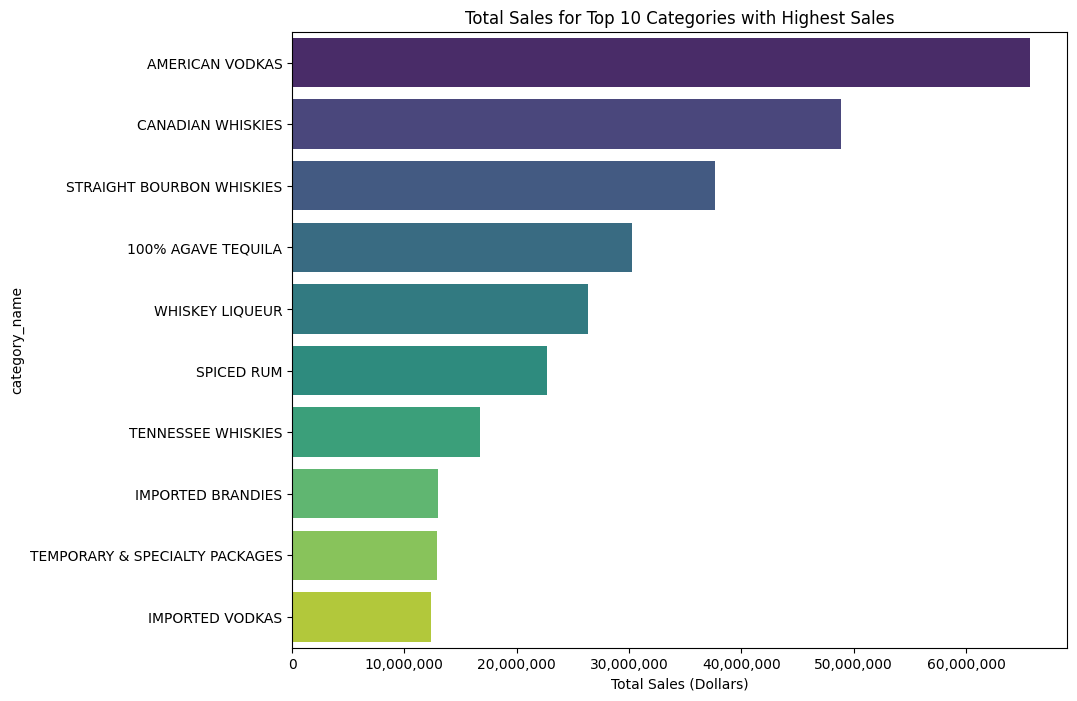

In [ ]:
import matplotlib.ticker as mtick

# calculate the sum of sales for each category
category_sales_sum = df.groupby('category_name')['sale_(dollars)'].sum()

# sort the categories by sales so the plot is easier to read
category_sales_sum_sorted = category_sales_sum.sort_values(ascending=False)

# take only top 10
top_categories_sales_sum = category_sales_sum_sorted.nlargest(10)

# make the plot
plt.figure(figsize=(10, 8))
sns.barplot(y=top_categories_sales_sum.index, x=top_categories_sales_sum.values, palette='viridis', orient='h')
plt.title('Total Sales for Top 10 Categories with Highest Sales')
plt.xlabel('Total Sales (Dollars)')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/cat_sales.png')  # saving plot
plt.show()


### B. Top 10 Counties

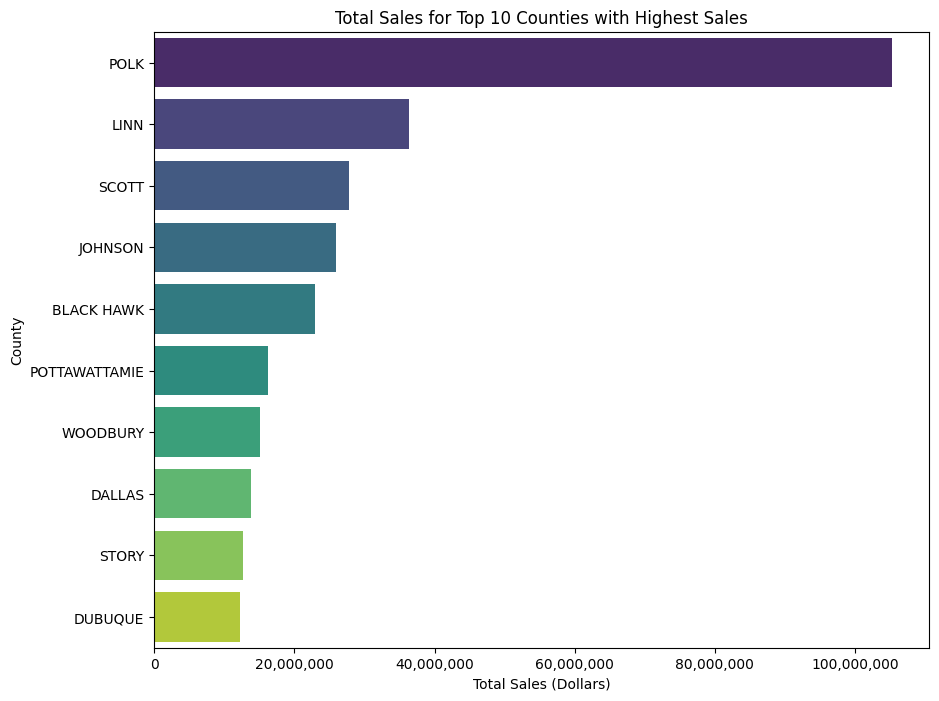

In [ ]:
# calculate the sum of sales for each county
county_sales_sum = df.groupby('county')['sale_(dollars)'].sum()

# sort the counties by sales so the plot is easier to read
county_sales_sum_sorted = county_sales_sum.sort_values(ascending=False)

# take only top 10
top_counties_sales_sum = county_sales_sum_sorted.nlargest(10)

# make the plot
plt.figure(figsize=(10, 8))
sns.barplot(y=top_counties_sales_sum.index, x=top_counties_sales_sum.values, palette='viridis', orient='h')
plt.title('Total Sales for Top 10 Counties with Highest Sales')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Total Sales (Dollars)')
plt.ylabel('County')
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/county_sales.png')  # saving plot
plt.show()

### C. Top 10 Cities

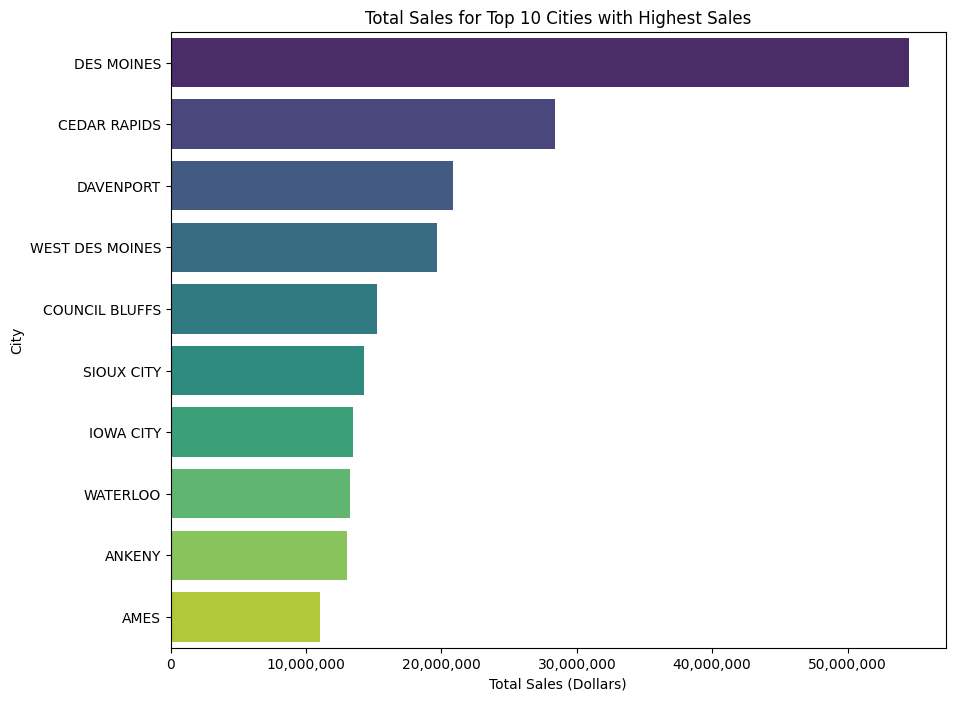

In [ ]:
# calculate the sum of sales for each city
city_sales_sum = df.groupby('city')['sale_(dollars)'].sum()

# sort the counties by sales so the plot is easier to read
city_sales_sum_sorted = city_sales_sum.sort_values(ascending=False)

# take only top 10
top_cities_sales_sum = city_sales_sum_sorted.nlargest(10)

# make the plot
plt.figure(figsize=(10, 8))
sns.barplot(y=top_cities_sales_sum.index, x=top_cities_sales_sum.values, palette='viridis', orient='h')
plt.title('Total Sales for Top 10 Cities with Highest Sales')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Total Sales (Dollars)')
plt.ylabel('City')
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/city_sales.png')  # saving plot
plt.show()

### D. Monthly Sales for Top 10 Categories

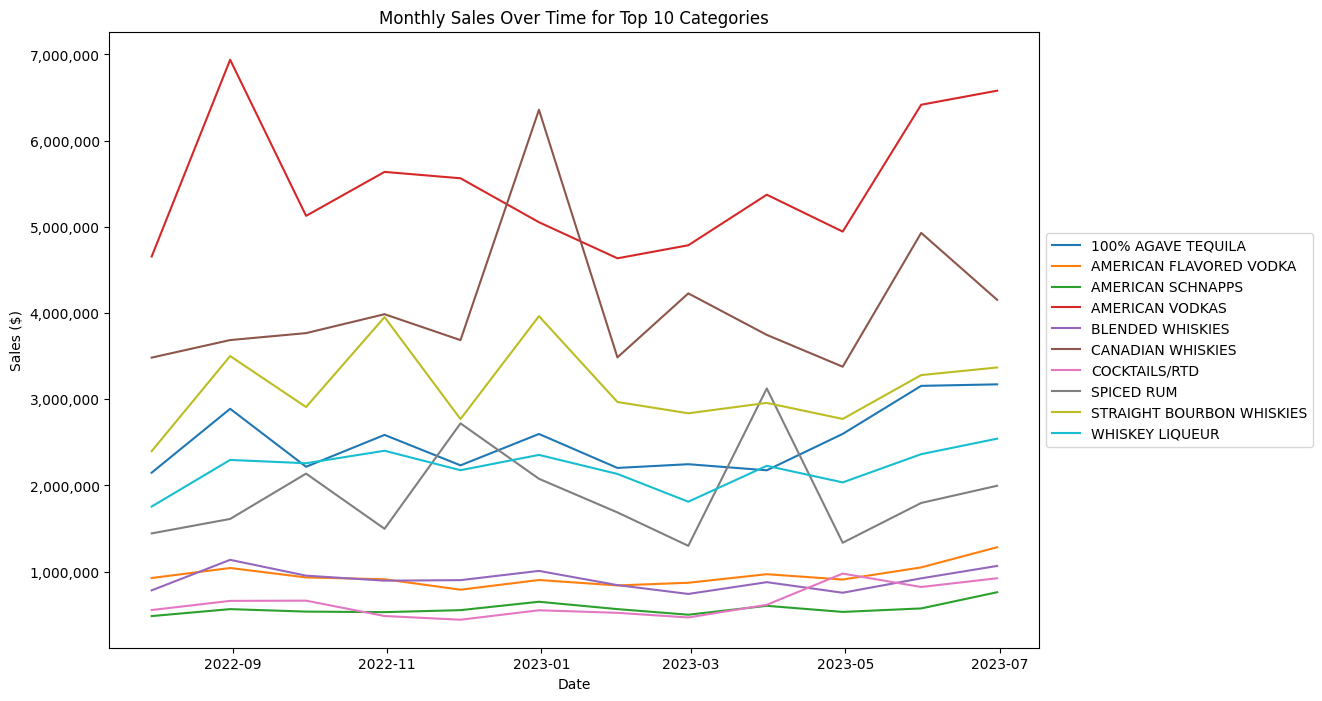

In [ ]:
# filter out rows of the top 10 categories
top_10_categories = df['category_name'].value_counts().nlargest(10).index
top_10_categories_df = df[df['category_name'].isin(top_10_categories)]

# group by date and category and calculate the sum of sales for each group
category_sales = top_10_categories_df.groupby(['date', 'category_name'])['sale_(dollars)'].sum()

# reset the index to convert 'date' and 'category_name' back to columns
category_sales = category_sales.reset_index()

# convert 'date' to datetime
category_sales['date'] = pd.to_datetime(category_sales['date'])

# pivot the DataFrame to have date as index, categories as columns, and sales as values
category_sales_pivot = category_sales.pivot(index='date', columns='category_name', values='sale_(dollars)')

# resample the data to monthly frequency, taking the sum for each month
category_sales_pivot = category_sales_pivot.resample('M').sum()

# plotting
plt.figure(figsize=(12,8))
for category in category_sales_pivot.columns:
    plt.plot(category_sales_pivot.index, category_sales_pivot[category], label=category)
plt.title('Monthly Sales Over Time for Top 10 Categories')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Here is the change
plt.savefig('/content/drive/MyDrive/Iowa Liquor /Visualisations/cat_sales_over_time.png')  # saving plot
plt.show()


Spice rum, straigh bourbon whiskies, american vodkas and canadian whiskies are susceptible to large spikes in sales.